## Análise Exploratória de Dados (EDA) - Clima de Brasília em 2024

### Introdução e Contexto

Compreender em profundidade os padrões e as interações entre as diferentes variáveis meteorológicas é uma tarefa de grande relevância. Este projeto se dedica a explorar os dados meteorológicos detalhados de Brasília ao longo do ano de 2024, buscando extrair insights e conhecimento a partir de uma análise exploratória.

### Objetivo
O foco é exclusivamente na compreensão dos dados, sem a construção de modelos preditivos nesta etapa. Os objetivos específicos são:

- Entender a distribuição das principais variáveis.

- Identificar correlações e relações.

- Visualizar os padrões sazonais e os ciclos diários que caracterizam o clima da região.

- Compreender melhor sobre as ocorrências da chuva.

### Sobre os Dados

Os dados utilizados nesta análise foram coletados de uma estação meteorológica em Brasília, abrangendo o período de 1º de janeiro a 31 de dezembro de 2024, com uma **granularidade horária**. O conjunto de dados inclui uma variedade de features meteorológicas, das quais as principais são:

- Temperatura do Ar `temp ar`: Medida em graus Celsius (°C).

- Umidade Relativa do Ar `umidade relativa ar`: Medida em porcentagem (%).

- Precipitação `precipitacao total`: Volume de chuva acumulado, em milímetros (mm).

- Radiação Solar `radiacao`: Energia solar recebida, em Kj/m².

- Pressão Atmosférica `pressao atmos nv estacao`: Medida em milibares (mB).

- Vento `vento velocidade`, `vento direcao`: Velocidade e direção do vento.

Os dados foram previamentes limpos em um notebook anterior deste mesmo repositório, onde foram criadas features essênciais para a construção do modelo na próxima etapa.

In [1]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from windrose import WindroseAxes
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Configurando gráficos seaborn
sns.set_palette(palette="crest")
sns.set_theme()

In [2]:
df = pd.read_csv("../data/INMET_DF_processado.csv", index_col=0, parse_dates=True)

print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}\n")

df.info(memory_usage='deep')

Quantidade de linhas: 8732
Quantidade de colunas: 40

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2024-01-01 to 2024-12-31
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   precipitacao total        8732 non-null   float64
 1   pressao atmos nv estacao  8732 non-null   float64
 2   pressao atmos max         8732 non-null   float64
 3   pressao atmos min         8732 non-null   float64
 4   radiacao                  8732 non-null   float64
 5   temp ar                   8732 non-null   float64
 6   temp pronto orvalho       8732 non-null   float64
 7   temp max                  8732 non-null   float64
 8   temp min                  8732 non-null   float64
 9   temp orvalho max          8732 non-null   float64
 10  temp orvalho min          8732 non-null   float64
 11  umidade max               8732 non-null   float64
 12  umidade min               8732 non-null   floa

In [3]:
df.head(4)

,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,temp orvalho max,...,umidade_media_3h,umidade_std_3h,umidade_media_6h,umidade_std_6h,umidade_media_12h,umidade_std_12h,umidade_media_24h,umidade_std_24h,chuva_acumulada_24h,choveu
data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2.6,884.5,884.5,883.8,50.745457,20.5,19.8,20.6,20.3,20.0,...,96.0,0.0,83.666667,14.841384,76.083333,14.951183,82.541667,12.765372,35.599999,1
2024-01-02,0.2,885.3,885.3,884.5,45.790910,20.2,19.6,20.6,20.1,19.8,...,96.0,0.0,86.000000,15.607690,77.833333,16.004734,83.250000,13.029231,35.799999,1
2024-01-02,0.0,885.9,885.9,885.3,40.836365,20.3,19.6,20.3,20.2,19.7,...,96.0,0.0,91.500000,11.022704,79.916667,16.648551,83.708333,13.284444,35.799999,0
2024-01-02,1.0,886.0,886.0,885.8,35.881817,20.3,19.6,20.4,20.2,19.7,...,96.0,0.0,96.000000,0.000000,82.666667,16.322507,84.041667,13.495504,36.799999,1


In [4]:
# análise estatistica geral das features principais
lista_features = df.columns.to_list()
colunas_sem_data = df.drop(columns=lista_features[-23:]).select_dtypes(include='number')
colunas_sem_data.describe()

,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,temp orvalho max,temp orvalho min,umidade max,umidade min,umidade relativa ar,vento direcao,vento rajada max,vento velocidade
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,0.156390,887.885948,888.132432,887.639498,810.853542,21.978023,14.456825,22.722572,21.272870,15.006825,13.929787,70.356390,64.032410,67.231677,147.047297,4.911166,2.088216
std,1.246848,2.405657,2.381224,2.415704,1045.430808,3.937688,5.136739,4.025165,3.834386,5.089886,5.203396,22.638593,23.143207,22.979961,101.298349,2.077796,0.987854
min,0.000000,880.600000,880.700000,880.500000,0.000000,9.500000,-4.200000,10.400000,9.500000,-3.200000,-5.000000,12.000000,10.000000,11.000000,1.000000,0.700000,0.100000
25%,0.000000,886.200000,886.500000,886.000000,44.829169,19.400000,10.400000,19.800000,19.000000,10.975000,9.900000,54.000000,46.000000,50.000000,79.000000,3.300000,1.300000
50%,0.000000,887.800000,888.000000,887.600000,172.330775,21.500000,16.700000,22.200000,20.800000,17.300000,16.100000,75.000000,66.000000,70.000000,108.000000,4.800000,2.000000
75%,0.000000,889.500000,889.700000,889.300000,1527.925000,24.800000,18.600000,25.700000,23.900000,19.100000,18.200000,91.000000,85.000000,88.000000,209.000000,6.325000,2.800000
max,35.200000,895.200000,895.200000,895.100000,4080.400000,35.400000,21.800000,36.100000,34.200000,22.600000,21.300000,99.000000,98.000000,98.000000,360.000000,18.900000,7.500000


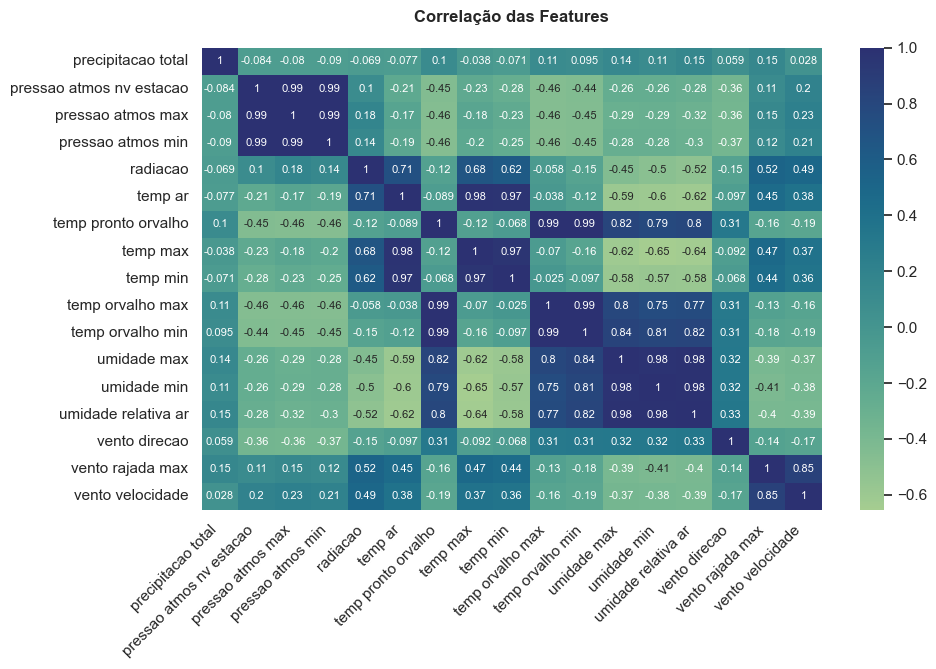

In [5]:
# Mapa de calor das correalações
plt.figure(figsize=(10,6))
sns.heatmap(colunas_sem_data.corr(),
            annot=True,
            annot_kws={'size':8},
            cmap="crest")

plt.xticks(rotation=45, ha='right')
plt.title('Correlação das Features\n', fontweight="bold")

# Plot
plt.show()

O gráfico de correlação revela padrões interessantes e que são esperados em dados meteorológicos:

- **Temperaturas:** As variáveis `temp ar`, `temp max`, `temp min` têm uma forte correlação positiva. O mesmo acontece com as temperaturas de ponto de orvalho (o que é esperado)

- **Pressão Atmosférica:** As três variáveis de pressão são praticamente idênticas.

- **Umidade:** Todas as umidades também possuem forte correlação entre si.

Deste modo, temos algumas correlações que revelam insights interessantes e relevantes:

- **Radiação vs Temperatura:** Existe uma correlação positiva forte entre `radiacao` e `temp ar` de `0.68`. Isso mostra que a radiação solar é um dos principais fatores que aquecem o ar.

- **Temperatura vs Umidade relativa:** A correlação negativa forte entre `temp ar` e `umidade relativa ar` de `-0.62` é um comportamento alto explicativo. Durante o dia, quando a temperatura sobe a umidade tende a cair, e vice versa.

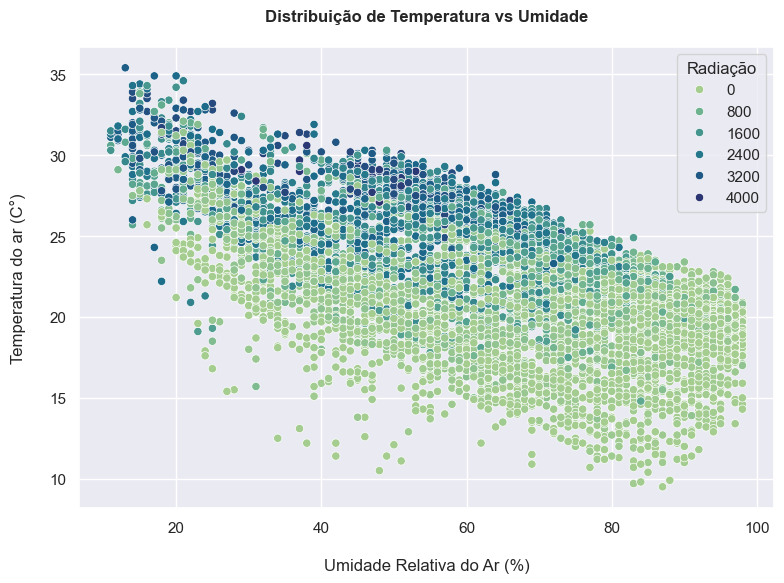

In [6]:
# Grafico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["umidade relativa ar"],
                y=df['temp ar'],
                hue=df['radiacao'],
                palette="crest")

plt.title("Distribuição de Temperatura vs Umidade\n", fontweight="bold")
plt.xlabel("\nUmidade Relativa do Ar (%)")
plt.ylabel("Temperatura do ar (C°)\n")
plt.legend(title="Radiação")

# Plot
plt.tight_layout()
plt.show()

A relação inversa entre Temperatura e Umidade:

- Quando a umidade está baixa `<40%`, a temperatura tende a ser alta `>25°C`.

- Quando a umidade está alta `>80%`, a temperatura tende a ser mais baixa `<23°C`.

Ao notar a terceira variável (as cores) é possível determinar que a **radiação** é a causa e a **temperatura** é o efeito.

Os pontos escuros (com alta radiação), estão concentrados na parte superior esquerda do gráfico. Isso significa que dias de alta radiação solar causam temperaturas elevadas e, consequentemente, baixa umidade relativa.

Os pontos claros (com a radiação zerada ou baixa), estão espalhados por toda a faixa de umidade, mas concentrados nas temperaturas mais baixas. Isso nos mostra que durante a noite (radiação zero), a temperatura cai, o que faz a umidade relativa subir (%).

### Observando a Sazonalidade

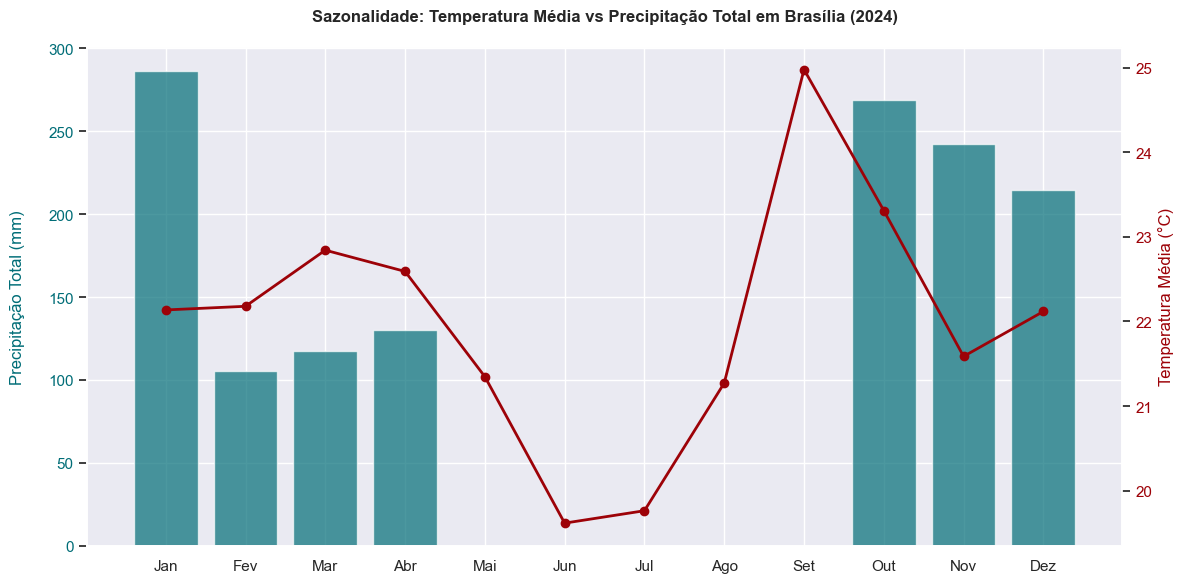

In [7]:
# agrupando os meses e calculando temperatura media e precipitação total
df['mes'] = df.index.month 
df_mensal = df.groupby('mes').agg(
    temp_media=('temp ar', 'mean'),
    precipitacao_total=('precipitacao total', 'sum')
).reset_index()

# configurando 2 graficos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras - Precipitação
color_prec = "#006d77"
ax1.bar(df_mensal['mes'],
        df_mensal['precipitacao_total'],
        color=color_prec,
        alpha=0.7,
        label='Precipitação')

ax1.set_xlabel('')
ax1.set_ylabel('Precipitação Total (mm)\n', color=color_prec)
ax1.tick_params(axis='y', labelcolor=color_prec)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax1.grid(True)

# Linha - Temperatura
color_temp = "#9d0208"
ax2 = ax1.twinx()
ax2.plot(df_mensal['mes'],
         df_mensal['temp_media'],
         color=color_temp,
         marker='o',
         linestyle='-',
         linewidth=2,
         label='Temperatura')

ax2.set_ylabel('Temperatura Média (°C)', color=color_temp)
ax2.tick_params(axis='y', labelcolor=color_temp)
ax2.grid(False)

# Plot
plt.title('Sazonalidade: Temperatura Média vs Precipitação Total em Brasília (2024)\n', fontweight="bold")
fig.tight_layout()
plt.show()

O gráfico apresenta um insight que podemos notar de imediato, pois é bem clara essa divisão entre duas estações:

➥ Estação chuvosa (verão): De outubro a abril, com altos volumes de precipitação. Janeiro se destaca como o pico das chuvas.

➥ Estação seca (inverno): De maio a setembro, com uma queda drástica na precipitação. Junho, julho e agosto são extremamente secos, com chuva igual a zero. O inverno é frio e seco, pois no gráfico mostra que o período de menor precipitação (barras) coincide com o período de menor temperatura média (linha). O ponto mais baixo da temperatura ocorre entre junho e julho, bem no meio do auge da seca.

O mês mais quente é setembro. A temperatura média atinge seu pico absoluto em setembro. Por quê? Porque neste mês a radiação solar da primavera já está muito forte, mas as chuvas (e as nuvens que vêm com elas) ainda não chegaram com força para "refrescar" a atmosfera. É o auge do calor combinado com o final da seca.

Observe que a transição de setembro para outubro a chuva age como um regulador térmico. Assim que as chuvas retornam de forma significativa (a barra de outubro), a temperatura média cai em relação ao pico de setembro. Isso mostra o efeito regulador da chuva e da nebulosidade, que aliviam o calor intenso.

Deste modo, para compreender melhor o período da seca durante o inverno será definido um ciclo normalizado no gráfico a seguir.

In [ ]:
# Definindo um ciclo de maio à setembro
df_epoca_seca = df.loc['2024-05-01':'2024-09-30']
variaveis_para_plotar = ['temp ar', 'radiacao', 'umidade relativa ar']

# Normalizando valores
scaler = MinMaxScaler()
df_scaled = df_epoca_seca[variaveis_para_plotar].copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled_longo = df_scaled.melt(ignore_index=False, var_name="variavel", value_name="valor")

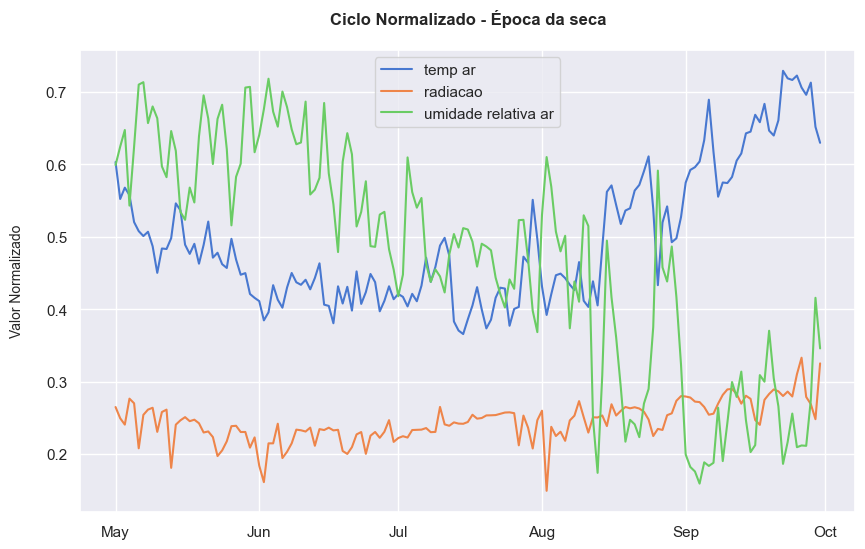

In [17]:
# Gráfico de linha
plt.figure(figsize=(10,6))
sns.lineplot(data=df_scaled_longo,
             x=df_scaled_longo.index,
             y="valor",
             hue="variavel",
             errorbar=None,
             palette="muted")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title("Ciclo Normalizado - Época da seca\n", fontweight="bold")
plt.legend(title="")
plt.ylabel("Valor Normalizado\n", fontsize=10)
plt.xlabel("")

# Plot
plt.show()

**Auge da Seca:** A linha da umidade relativa do ar (verde) começa a cair em maio, mostrando uma tendência clara de queda até atingir seus valores mais baixos e críticos entre o final de agosto e meados de setembro. Isso demonstra visualmente o auge do período de estiagem.

**O inverno no meio da seca:** A linha da temperatura do ar (azul) mostra um comportamento de "vale". Ela cai, atingindo os valores mais baixos em junho e julho, que são os meses mais frios do inverno. Depois, a partir de agosto, ela começa a subir de forma acentuada.

A relação inversa crítica entre a temperatura e umidade possui um insight muito importante a partir de agosto. Enquanto a temperatura sobe, a umidade atinge seus níveis mais baixos. Essa combinação de calor e ar extremamente seco é o que caracteriza o final da seca em Brasília, período com maior risco de incêndios e problemas respiratórios.

O papel da radiação solar, a linha da radiação (laranja), apesar de parecer mais estável também acompanha o ciclo sazonal. Ela atinge seu ponto mais baixo em junho (inverno, dias mais curtos e sol mais "fraco") e começa a subir gradualmente, "puxando" a temperatura para cima nos meses seguintes.

### Análise do vento

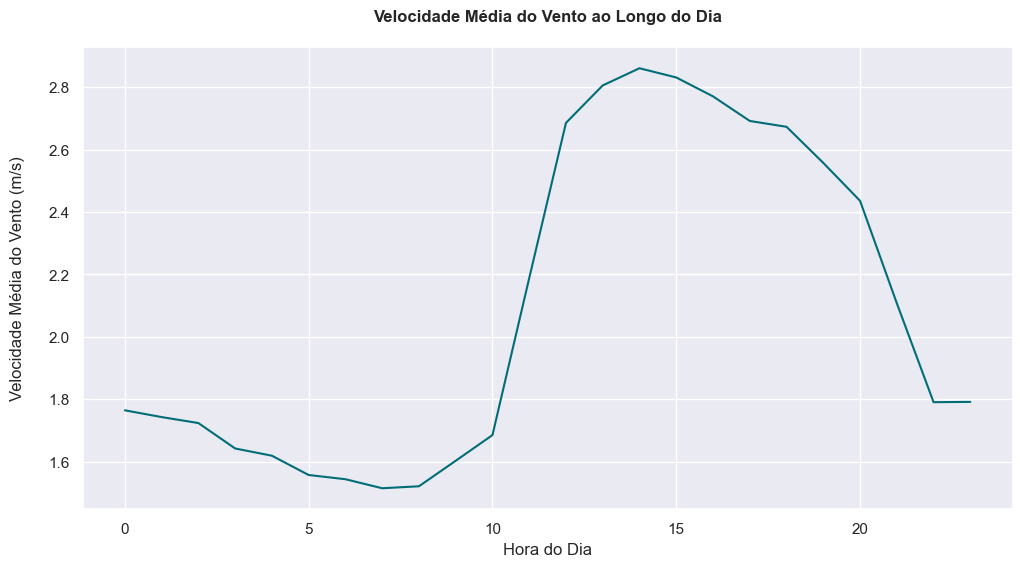

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,
             x="hora_num",
             y="vento velocidade",
             errorbar=None,
             color="#006d77")

plt.title("Velocidade Média do Vento ao Longo do Dia\n", fontweight="bold")
plt.xlabel("Hora do Dia")
plt.ylabel("Velocidade Média do Vento (m/s)\n")
plt.show()

A velocidade do vento possui uma calmaria noturna e um pico de intensidade no meio da tarde, provavelmente por conta do aquecimento da superfície e pela mistura atmosférica.

Abaixo, será analisado como o vento se comporta durante as chuvas.

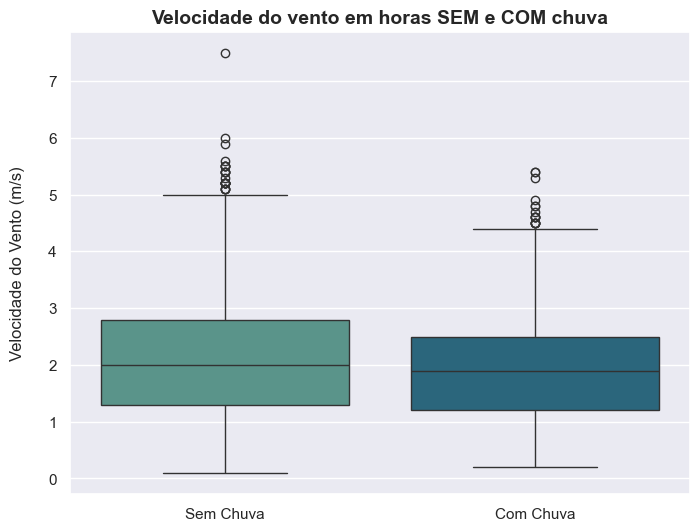

In [11]:
# Boxplot - Vento sem e com chuva
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,
            x="choveu",
            y="vento velocidade",
            palette="crest")

plt.title("Velocidade do vento em horas SEM e COM chuva",
          fontsize=14, fontweight='bold')

plt.xlabel("")
plt.ylabel('Velocidade do Vento (m/s)\n', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Sem Chuva', 'Com Chuva'])
plt.show()

O boxplot mostra a distribuição da velocidade **média horária** do vento para cada uma das horas do ano. Foi pego o valor médio da velocidade do vento e os colodado em box de `Sem Chuva` e `Com Chuva`.

A observação mais direta é que a linha central do boxplot, a mediana, é sutilmente mais baixa `Com Chuva` do que em `Sem Chuva`. Isso indica que, na metade das horas chuvosas, a velocidade média do vento foi menor do que na metade das horas secas. Isso quebra a intuição comum de que "a chuva sempre significa mais vento".

A caixa e os seus limites do grupo `Sem Chuva` são mais longos, estendendo-se a velocidades mais altas (até 5 m/s, desconsiderando os outliers). Esse grupo também apresenta mais outliers e com valores mais extremos, chegando a mais de 7 m/s.

Deste modo, embora a chuva possa trazer vento, os eventos mais forte em Brasília durante 2024 ocorreram em horas sem precipitação de chuva.

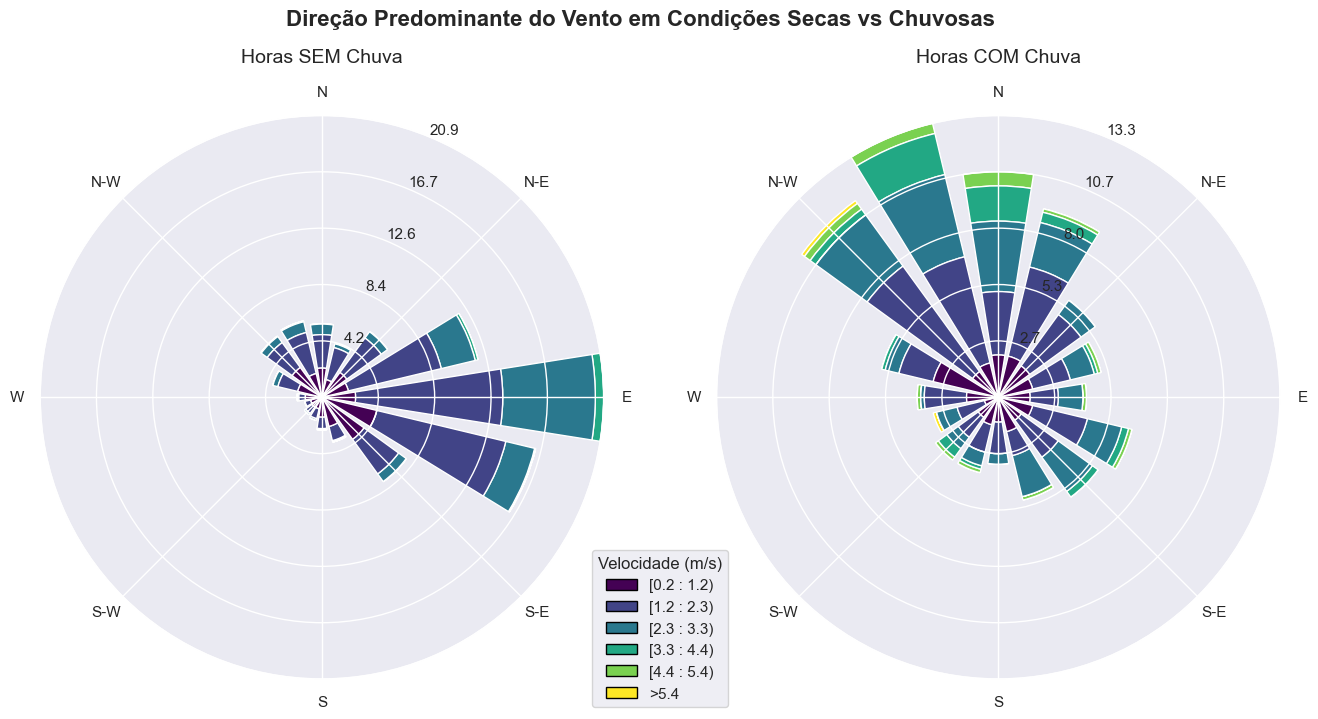

In [12]:
# separando o dataframe
df_com_chuva = df[df["choveu"] == 1]
df_sem_chuva = df[df["choveu"] == 0]

# Gráfico - Rosa dos Ventos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8),
                               subplot_kw={'projection': 'windrose'})

fig.suptitle('Direção Predominante do Vento em Condições Secas vs Chuvosas\n',
             fontsize=16, fontweight='bold')

# Horas sem chuva
ax1.set_title('Horas SEM Chuva', fontsize=14, y=1.08)
ax1.bar(df_sem_chuva['vento direcao'],
        df_sem_chuva['vento velocidade'],
        normed=True,
        opening=0.8,
        edgecolor='white',
        cmap=plt.cm.viridis)

# Horas com chuva
ax2.set_title('Horas COM Chuva', fontsize=14, y=1.08)
ax2.bar(df_com_chuva['vento direcao'],
        df_com_chuva['vento velocidade'],
        normed=True,
        opening=0.8,
        edgecolor='white',
        cmap=plt.cm.viridis)

ax2.legend(title="Velocidade (m/s)", loc='center', bbox_to_anchor=(-0.1, 0.09))
plt.show()

A Rosa dos Ventos mostra a frequência e a **distribuição de intensidade dos ventos, condicionada a uma direção**. A cor diz qual a velocidade do vento naquele momento e em qual direção ele soprava. Os números nos anéis concêntricos (4.2, 8.4, 12.6, 16.7, 20.9, etc.) representam a frequência em porcentagem, fornecido pelo parametro `normed=True`.

**O Vento Padrão (Horas SEM Chuva)**

O gráfico da esquerda mostra o comportamento do vento na grande maioria do tempo. A direção predominante dos ventos vêm do quadrante Leste (E). Mais de 20% de todas as horas secas registraram ventos vindos diretamente desta direção. Esses ventos de Leste possuem uma variedade de velocidades, mas são majoritariamente de intensidade leve a moderada.

**O Vento de Chuva (Horas COM Chuva)**

O gráfico da direita, que representa apenas as horas em que choveu, mostra uma realidade diferente. A dominância do vento Leste desaparece. Sendo assim, os ventos mais frequentes agora vêm do quadrante Noroeste (N-W) e Norte (N). As cores nas "pétalas" do Noroeste e Norte, há uma proporção muito maior de cores mais claras (verde e amarelo), indicando que os ventos associados à chuva são, em média, mais fortes do que os ventos de Leste em tempo seco.

### Análise da chuva

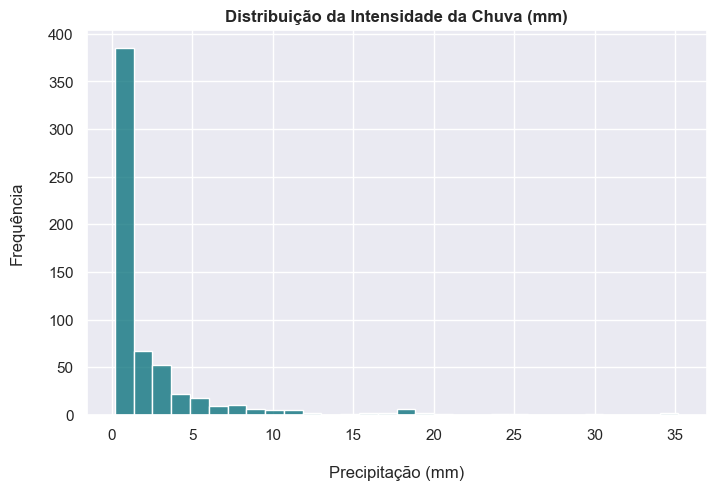

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["precipitacao total"] > 0]["precipitacao total"],
             bins=30,
             kde=False,
             color="#006d77")

plt.title("Distribuição da Intensidade da Chuva (mm)", fontweight="bold")
plt.xlabel("\nPrecipitação (mm)")
plt.ylabel("Frequência\n")
plt.show()

O histograma mostra que quando chove em Brasília, a maior parte das ocorrências é de baixa intensidade, geralmente entre 1 e 2 mm, o que sugere chuvas fracas e frequentes. Já as precipitações mais intensas são bem menos comuns. Observa-se uma queda progressiva na frequência à medida que os volumes aumentam, com chuvas fortes entre 8 e 12 mm aparecendo de forma rara, e episódios extremos próximos de 20 mm.

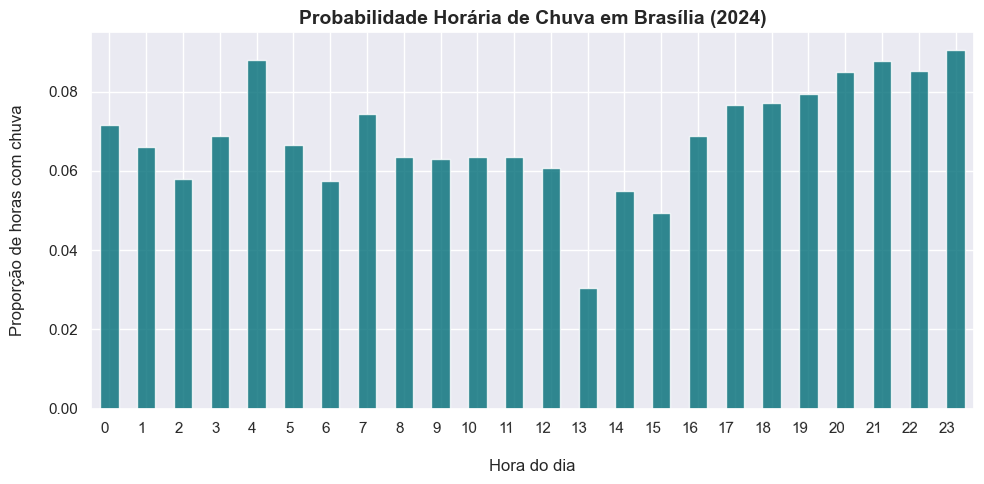

In [14]:
# Analisando a probabilidade de chuva durante 24hr
chuva_horaria = df.groupby("hora_num")["choveu"].mean()

plt.figure(figsize=(10,5))

chuva_horaria.plot(kind="bar",
                   color="#006d77",
                   alpha=0.8)

plt.title("Probabilidade Horária de Chuva em Brasília (2024)",
          fontsize= 14, fontweight="bold")

plt.ylabel("Proporção de horas com chuva\n")
plt.xlabel("\nHora do dia")
plt.xticks(rotation=1, ha='right')

# Plot
plt.tight_layout()
plt.show()

Este gráfico mostra que o ciclo de chuva durante o dia em Brasília segue dois picos distintos, ou seja, um ciclo **bimodal**.

A probabilidade da chuva começa a subir a partir das 16 horas até o fim da noite. Durante a virada no início da madrugada, surge um segundo pico que se extende até mais ou menos umas 5 horas.

Curiosamente, o período de menor probabilidade de chuva coincide com o de maior radiação e temperatura (início da tarde), que é quando a energia para a formação de novas chuvas está se acumulando, com a precipitação ocorrendo como um efeito posterior (entre 13h e 14h).

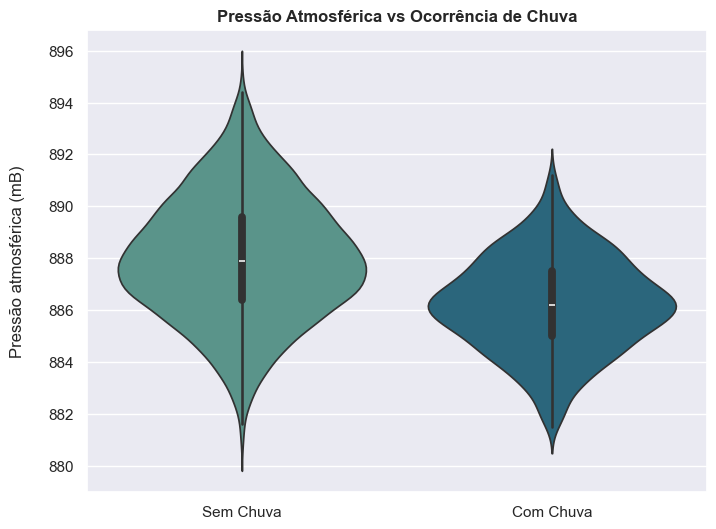

In [15]:
# Pressão atmosférica e ocorrência de chuva
plt.figure(figsize=(8,6))
sns.violinplot(data=df,
               x="choveu",
               y="pressao atmos nv estacao",
               palette="crest")

plt.title("Pressão Atmosférica vs Ocorrência de Chuva", fontweight="bold")
plt.ylabel("Pressão atmosférica (mB)\n")
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=['Sem Chuva', 'Com Chuva'])
plt.show()

Um princípio interessante da meteorologia pode ser observada muito bem a partir desse gráfico, pois a formação da chuva está associada à baixa pressão atmosférica. Isso significa que o ar fica mais leve e tendendo a subir, esfriando e formando as nuvens (uma forte causa da precipitação).

Com o *violin plot* é possível observar a densidade e concentração desses dados, apresentando em seu "corpo" de violino uma forma "espremida" se concentrando em uma pressão próxima à *886mB*, provavelmente sendo uma das condições específicas para a chuva se formar em Brasília.

Em contrapartida, a ausência de chuva é a condição padrão do clima, ocorrendo um espaço mais amplo e geralmente com altas pressões atmosféricas.

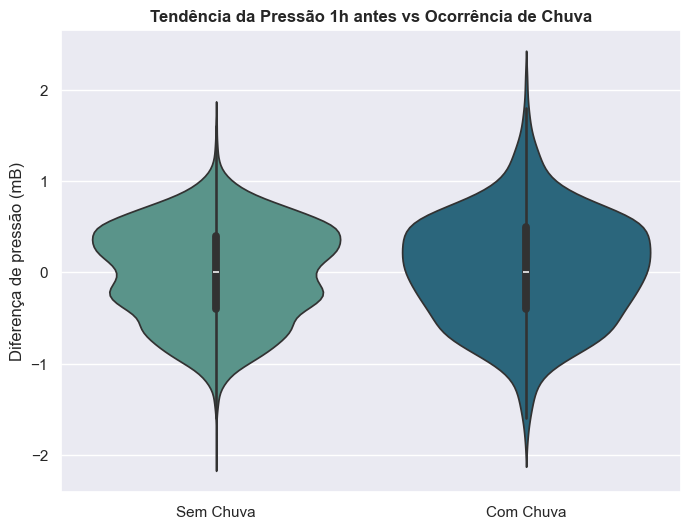

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,
               x="choveu",
               y="pressao_tendencia_1h",
               palette="crest")

plt.title("Tendência da Pressão 1h antes vs Ocorrência de Chuva", fontweight="bold")
plt.ylabel("Diferença de pressão (mB)")
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=['Sem Chuva', 'Com Chuva'])
plt.show()

A análise da tendência da pressão 1h antes mostra que períodos sem chuva mantêm uma pressão estável, com variações próximas de zero. Já nos períodos com chuva, observa-se maior volatilidade, com quedas e aumentos mais acentuados. Esse comportamento funciona como uma assinatura clara da instabilidade atmosférica, condição essencial para a formação da precipitação.

### Conclusões finais

A análise exploratória permitiu compreender os principais padrões do clima de Brasília em 2024 e revelou insights importantes:

* *Sazonalidade clara*: existe uma divisão bem marcada entre estação chuvosa (outubro a abril) e estação seca (maio a setembro). O inverno é frio e seco, enquanto setembro concentra o maior calor antes da chegada das chuvas.

* *Relação temperatura x umidade*: confirmou-se a correlação negativa entre essas variáveis. Dias quentes estão associados a baixa umidade, especialmente no auge da seca, aumentando o risco de incêndios e desconforto respiratório.

* *Radiação solar como fator-chave*: mostrou-se determinante tanto na variação da temperatura quanto na sazonalidade do ciclo climático.

* *Padrões do vento*: ventos secos predominam do quadrante leste, mas em condições de chuva há mudança para ventos do norte/noroeste, geralmente mais intensos.

* *Pressão atmosférica*: verificou-se a associação entre baixa pressão e ocorrência de chuvas, além de maior instabilidade horária antes da precipitação.

* *Comportamento da chuva*: a maioria dos eventos de precipitação foi de baixa intensidade, mas eventos extremos também ocorreram, embora de forma rara. A distribuição horária mostrou um padrão bimodal, com maior probabilidade de chuva no fim da tarde/noite e início da madrugada.

### Próximos passos

Esses achados fornecem uma base sólida para a etapa de modelagem, especialmente para classificar se choveu ou não (variável alvo `choveu`).